In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# PCA
Principal Component Analysis (Метод главных компонентов)

Text(0, 0.5, 'Площадь дома')

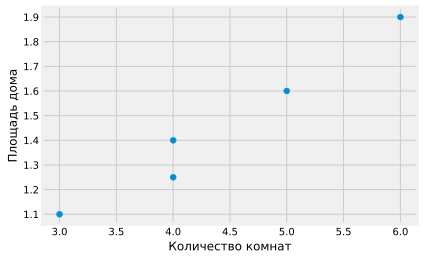

In [2]:
# столбец 0 - количество комнат
# столбец 1 - площадь дома
houses = np.array([[5, 1.6],
                   [4, 1.4],
                   [6, 1.9],
                   [3, 1.1],
                   [4, 1.25]])
plt.scatter(houses[:, 0], houses[:, 1])
plt.xlabel('Количество комнат')
plt.ylabel('Площадь дома')

In [3]:
houses

array([[5.  , 1.6 ],
       [4.  , 1.4 ],
       [6.  , 1.9 ],
       [3.  , 1.1 ],
       [4.  , 1.25]])

In [4]:
mean_value = np.mean(houses, axis=0)
mean_value

array([4.4 , 1.45])

In [5]:
houses_centered = houses - mean_value
houses_centered

array([[ 0.6 ,  0.15],
       [-0.4 , -0.05],
       [ 1.6 ,  0.45],
       [-1.4 , -0.35],
       [-0.4 , -0.2 ]])

In [6]:
covarience_matrix = np.cov(houses_centered.T)
covarience_matrix

array([[1.3   , 0.35  ],
       [0.35  , 0.0975]])

In [7]:
print(np.var(houses_centered[:, 0], ddof=1))
print(np.var(houses_centered[:, 1], ddof=1))

1.3
0.09749999999999998


In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covarience_matrix)
print(eigenvalues, eigenvectors, sep='\n')

[1.39445221 0.00304779]
[[ 0.96546225 -0.26054298]
 [ 0.26054298  0.96546225]]


Собственные значения eigenvalues сильно отличаются - первое значение намного больше второго
Поэтому оставим только собственный вектор из столбца 0 массива векторов

In [9]:
result_pre = np.dot(houses_centered, eigenvectors[:, 0])
result = result_pre.reshape(-1, 1)
result

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

In [11]:
mc = pca.fit_transform(houses)
mc

array([[ 0.6183588 ],
       [-0.39921205],
       [ 1.66198394],
       [-1.44283719],
       [-0.4382935 ]])

In [12]:
# Потеряем менее одного процента информации
pca.explained_variance_ratio_ 

array([0.99781911])

## Применение PCA в моделях машинного обучения

In [13]:
x_train = pd.read_pickle('../data/titanic_x_train.pkl')
y_train = pd.read_pickle('../data/titanic_y_train.pkl')

x_valid = pd.read_pickle('../data/titanic_x_valid.pkl')
y_valid = pd.read_pickle('../data/titanic_y_valid.pkl')

In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 299 to 103
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         668 non-null    int32  
 1   Age         668 non-null    float64
 2   SibSp       668 non-null    int64  
 3   Parch       668 non-null    int64  
 4   Fare        668 non-null    float64
 5   Embarked_C  668 non-null    uint8  
 6   Embarked_Q  668 non-null    uint8  
 7   Embarked_S  668 non-null    uint8  
 8   Pclass_1    668 non-null    uint8  
 9   Pclass_2    668 non-null    uint8  
 10  Pclass_3    668 non-null    uint8  
dtypes: float64(2), int32(1), int64(2), uint8(6)
memory usage: 32.6 KB


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_valid_scaled = pd.DataFrame(x_valid_scaled, columns=x_valid.columns)

In [17]:
pca = PCA(random_state=100)
pca.fit(x_train_scaled)

PCA(random_state=100)

In [18]:
pca.explained_variance_ratio_

array([2.22480052e-01, 1.80579178e-01, 1.61196472e-01, 1.18874068e-01,
       9.43088132e-02, 7.61203186e-02, 6.30288483e-02, 4.72728880e-02,
       3.61393615e-02, 4.97966346e-32, 2.19776916e-32])

In [19]:
np.sum(pca.explained_variance_ratio_[:7])

0.9165877504406761

In [20]:
# Оставим только 7 главных компонентов
pca = PCA(n_components=7, random_state=100)

In [21]:
x_train_mc = pca.fit_transform(x_train_scaled)
x_valid_mc = pca.transform(x_valid_scaled)

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [23]:
lr.fit(x_train_mc, y_train)

LogisticRegression()

In [24]:
y_pred = lr.predict(x_valid_mc)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_valid)

0.8026905829596412